**Ejercicio 2**: Datos no Estructurados, Análisis de chats de Davivienda.

**Por**: *David Doncel Ballén*, creado en agosto 7 de 2022.

**Code Repository**: https://github.com/DaDo82/Machine-Learning/tree/main/Ej2_analisis_chats_LDS

# Ejercicio 2 - Identificación de temáticas a partir de Chats

El objetivo de este ejercicio es identificar temáticas de interes que sirvan para el análisis de negocio a partir de la aplicación de la técnica *Latent Dirichlet Allocation (LDA)*.

### Contenido

- [Cargue de los datos](#Cargue-de-los-datos)
- [Limpieza de los datos](#Limpieza-de-los-datos)
- [Construcción bolsa de Palabras](#Construcción-bolsa-de-Palabras)
- [Análisis Exploratorio](#Análisis-Exploratorio)
  - [Palabras más usadas](#Palabras-más-usadas)

<br>
<br>

# Cargue de los datos

In [1]:
# Importando librerias básicas para la ejecución del código
import os
import sys
import tarfile
import time
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
df = pd.read_csv('davivienda_tweets.csv', encoding='utf-8')
df.head(3)

,id,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Andrés Langebaek,@ALangebaek,2021-12-01T20:43:12.000Z,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,NaN,1.0,7,19,['https://pbs.twimg.com/media/FFjL57eXMAISBnk?...,https://twitter.com/ALangebaek/status/14661458...
1,1,Plaza Futura,@plaza_futura,2021-12-01T21:18:10.000Z,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,✅ ✅ ✅ ✅ ✅,NaN,NaN,NaN,['https://pbs.twimg.com/ext_tw_video_thumb/146...,https://twitter.com/plaza_futura/status/146615...
2,2,Julián Martinez,@JulianM998,2021-12-01T22:49:11.000Z,Julián Martinez\n@JulianM998\n·\n1 dic.,Señores \n@Davivienda\n no he podido ingresar ...,NaN,1.0,NaN,1,[],https://twitter.com/JulianM998/status/14661775...


# Limpieza de los datos

In [3]:
df.loc[0, 'Embedded_text'][-50:]

', asociado al aumento en la tasa de cambio.\n1\n7\n19'

In [4]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [5]:
preprocessor(df.loc[0, 'Embedded_text'][-50:])

' asociado al aumento en la tasa de cambio 1 7 19'

In [6]:
df['Embedded_text'] = df['Embedded_text'].apply(preprocessor)
data_clean = pd.DataFrame(df.Embedded_text.apply(preprocessor))
data_clean

,Embedded_text
0,la confianza se afectó el indicador de confian...
1,buscamos la accesibilidad y mejor atención en ...
2,señores davivienda no he podido ingresar a mi ...
3,llevo toda una semana sufriendo intento de hur...
4,hemos retrocedido tanto en este país con este ...
...,...
1806,en respuesta a jaimemolina buenas tardes sr ja...
1807,en respuesta a josefe71 hola jose gracias por ...
1808,en respuesta a gleniiaaa hola bienvenida a nue...
1809,en respuesta a diegoruix buenos días sr diego ...


# Construcción bolsa de Palabras

In [7]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('spanish')

cv = CountVectorizer(stop_words=stop,
                    max_df=0.1,
                    max_features=100)
data_cv = cv.fit_transform(data_clean.Embedded_text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index

data_dtm.to_pickle('dtm.pkl')
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open('cv.pkl', 'wb'))


In [8]:
data_dtm

,ahora,ahorros,app,asnasalvaje,así,atención,ayudar,ayudarle,banco,bancolombia,...,tan,tardes,tarjeta,tiempo,tipo,trabajamos,ustedes,validaremos,van,wilsonariasc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1808,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1809,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Análisis Exploratorio

In [9]:
data = pd.read_pickle('dtm.pkl') #Generación Dataset por registro
data = data.transpose()
data = data.sort_index()
data

,0,1,2,3,4,5,6,7,8,9,...,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810
ahora,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ahorros,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
app,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
asnasalvaje,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
así,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trabajamos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ustedes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
validaremos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
van,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Conteo de Palabras

## Palabras con mayor frecuencia por chats

In [10]:
#Consolidando las palabras significativas
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(10)
    top_dict[c]= list(zip(top.index, top.values))
print(top_dict)
# Salida del top de 14 palabras por chat
#for top_words in top_dict.items():
#    print(', '.join([word for word, count in top_words[0:1]]))

{0: [('ahora', 0), ('número', 0), ('puedo', 0), ('puede', 0), ('problema', 0), ('presentados', 0), ('podamos', 0), ('plata', 0), ('pasa', 0), ('pago', 0)], 1: [('banco', 3), ('mejor', 1), ('atención', 1), ('bancos', 1), ('ahora', 0), ('pagar', 0), ('página', 0), ('puedo', 0), ('puede', 0), ('problema', 0)], 2: [('app', 1), ('así', 1), ('señores', 1), ('días', 1), ('datos', 1), ('ahora', 0), ('pagar', 0), ('puedo', 0), ('puede', 0), ('problema', 0)], 3: [('ahorros', 1), ('cuenta', 1), ('plata', 1), ('queremos', 0), ('puedo', 0), ('puede', 0), ('problema', 0), ('presentados', 0), ('podamos', 0), ('pasa', 0)], 4: [('solo', 1), ('tan', 1), ('cajeros', 1), ('ahora', 0), ('puede', 0), ('problema', 0), ('presentados', 0), ('podamos', 0), ('plata', 0), ('pasa', 0)], 5: [('daviplata', 2), ('plata', 1), ('banco', 1), ('si', 1), ('ahora', 0), ('oficina', 0), ('puede', 0), ('problema', 0), ('presentados', 0), ('podamos', 0)], 6: [('https', 1), ('ahora', 0), ('número', 0), ('puedo', 0), ('puede', 0

[('problema', 1610), ('puede', 1566), ('presentados', 1562), ('podamos', 1377), ('plata', 1134), ('ahora', 1115), ('puedo', 1081), ('pasa', 819), ('número', 769), ('oficina', 492), ('pago', 477), ('pagar', 210), ('si', 164), ('banco', 159), ('buenas', 158), ('daviplata', 154), ('página', 151), ('respondiendo', 137), ('cuenta', 134), ('días', 127), ('tardes', 121), ('dinero', 117), ('app', 104), ('wilsonariasc', 99), ('día', 96), ('bancolombia', 95), ('hacer', 90), ('marianiniecheve', 89), ('gusto', 88), ('sfcsupervisor', 85), ('queremos', 83), ('servicio', 82), ('buenos', 81), ('ustedes', 78), ('atención', 76), ('hace', 75), ('lugar', 75), ('nadie', 74), ('nombre', 74), ('solo', 73), ('solución', 73), ('inconvenientes', 71), ('conocer', 70), ('mismo', 69), ('sr', 67), ('validaremos', 66), ('saludos', 65), ('gracias', 64), ('equivocado', 63), ('mejor', 62), ('datos', 61), ('así', 60), ('hola', 60), ('mejorar', 59), ('línea', 58), ('tarjeta', 58), ('hoy', 56), ('navidad', 56), ('detalles

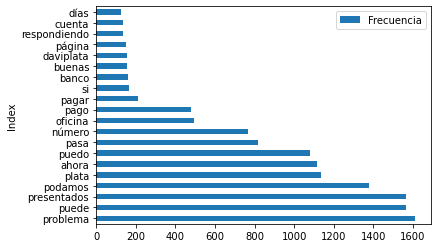

In [11]:
from collections import Counter

# seleccionando las palabras con mayor frecuencia o repeticones en los chats
words = []
for c in data.columns:
    top = [word for (word, count) in top_dict[c]]
    for t in top:
        words.append(t)
print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 10]

#Preparando la gráfica
df=pd.DataFrame(Counter(words).most_common())
df = df.rename(columns={0:'Index',1:'Frecuencia'})
df = df.head(20)
ax = df.plot.barh(x='Index')

## Nube de Palabras

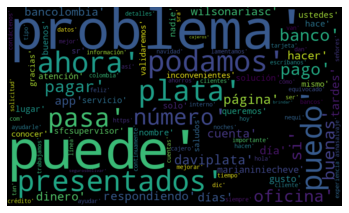

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


mask = np.array(Image.open(r'D:\Data_Science\Pruebas\Davivienda\Ejercicio_2_Chats\nube-palabras-texto.png'))

wc = WordCloud(stopwords = stop,
               mask = mask, background_color = "black",
               max_words = 1000, max_font_size = 2000,
               random_state = 42, width = 1000,
               height = 1000)
text=Counter(words).most_common() 
wc.generate(str(text))

plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [14]:
count = CountVectorizer(stop_words=stop,
                        max_df=.05,
                        max_features=5000)
X = count.fit_transform(data_clean.Embedded_text)
data_stop = pd.DataFrame(X.toarray(), columns=count.get_feature_names_out())
data_stop.index = data_clean.index

data_clean.to_pickle('data_clean.pkl')
pickle.dump(count, open("count.pkl", "wb"))

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10,
                                random_state=123,
                                learning_method='batch')
X_topics = lda.fit_transform(X)


In [16]:
# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

In [17]:
lda.components_.shape

(10, 5000)

In [19]:
n_top_words = 10
feature_names = count.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words - 1:-1]]))

Topic 1:
marianiniecheve segurosbolivar sfcsupervisor hace página hacer dice ustedes puedo vez
Topic 2:
disculpas molestias antemano ocasionadas así ayudarle solicitud ofrecemos atención información
Topic 3:
experiencia mejorar podamos continuamente trabajamos ayudar brindar pedimos importante contáctenos
Topic 4:
lugar equivocado tipo escribanos validar colombia plata inconvenientes lamentamos van
Topic 5:
lamentamos inconvenientes validaremos escríbanos conocer presentados queremos detalles buenos saludos
Topic 6:
servicio hacer cliente solo atención tan mal ustedes marianiniecheve nunca
Topic 7:
concierto andrescepeda navidad gran https seguros sfcsupervisor plata seguridad información
Topic 8:
interno ayudarle sr gracias buenos feliz novedad hola adicional evidenciamos
Topic 9:
número nombre asnasalvaje envíenos documento revisar únicamente feliz datos nequi
Topic 10:
solución problema hermano señores dan edimejia1979 hacer solo da dicen
